In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [2]:
%matplotlib notebook

# Building Salience: Basic Plotting in Matplotlib

**Version 0.1**

***
By AA Miller 
5 Jan 2021

As discussed in today's lecture, and previous lectures, there is no limit on the number of choices you have when developing visual communications. This ranges from the relatively mundane – should the plot axis be 1 mm or 1.3 mm thick? – to the subtle and vitally complex – should the isolated 7-$\sigma$ outlier be highlighted or just referenced in a caption? 

All of these choices (yes, even something as mundane as the width of the axis) affect the salience of what is being presented. 

To better understand how to build salience *in `matplotlib`* today's problems will first focus on the default settings. After examining the defaults, and identifying situations when they simply will not do, we will apply what we have learned to improve the salience of *an existing* image. 

**Important disclaimer** Many DSFP notebooks are designed with a goal to *do the thing*. While this notebook also has a *do the thing* component (namely to examine plotting choices in `matplotlib`), it is more essential to *consider the output*. Rather than rushing to "level up" each problem, consider the visual output *and how it affects what you are communicating to your audience*.

## Problem 1) Matplotlib Defaults & A Basic Plot

The single most influential factor in the final appearance of the visualizations that you create is the default settings for your preferred plotting software$^\dagger$, whether you typically use `matplotlib` or something else. 

Therefore it is important to understand the defaults, and how they are secretly (or not so secretly) affecting the final output of your work.

$^\dagger$ There are some exceptions like [D3.js](https://d3js.org/) where literally every element of the visualization has to be specified by the user.

The default settings in `matplotlib` [changed dramatically between versions 1.0 and 2.0](https://matplotlib.org/users/dflt_style_changes.html). These changes were all for the better, but, as the docs say "it is impossible to select the best default for all cases."

**Problem 1a**

Create a "toy" data set using the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) function from [`scikit-learn`](https://scikit-learn.org/stable/index.html) to generate 3 different classes in a 4 dimensional data space.

*Hint – execute the cell below*

In [98]:
np.random.seed(2003)
X, y = make_classification(n_samples=367, n_classes=3, 
                           n_features=4, n_redundant=0, n_informative=4,
                           flip_y=0.02, weights=[0.579,0.42, 0.001])

Let's unpack what we just did: we created a data set with `n_samples=367` sources, separated across `n_classes=3` different classes, in a `n_features=4` dimensional space. The classes are not balanced, execute the cell below to show that class 2 is quite rare.

In [99]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([210, 155,   2]))

Recall that `scikit-learn` feature arrays (typically labeled `X`) are 2D `numpy` arrays where each row corresponds to an individual source and each column corresponds to a different feature. We will mostly focus on feature (i.e., columns) 1 and 2 and classes 0 and 1 today (the other class will become important in the end). 

**Problem 1b) A scatter plot function**

Create a function `basic_scatter()` that takes as arguments a maplotlib axis instance `ax`, a scikit-learn data array `X`, and optional `**kwargs`. The function should add a scatter plot to the axis instance using the first two features in `X`, and then return `ax`. Note that this construction is a little silly, but it will allow us to easily loop and examine several different options in subsequent problems.

*Hint - use the [`plt.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) call to create the scatter plot. This will require "turning off" the lines `ls = 'None'`, and specifying a marker `m = 'o'`. We will start with a circle but examine this choice later.*

In [94]:
def basic_scatter(ax, X, m='o', **kwargs):
    """Add simple scatter plot to axis object
    
    Parameters
    ----------
    ax : matplotlib.pyplot axis instance
        The axis object that will have/display the scatter plot
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples.
    
    m : matplotlib marker, optional (default = 'o')
        A matplotlib marker, see: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_marker 
    
    Returns
    -------
    
    ax : matplotlib.pyplot axis instance
        The axis object with an associated scatter plot
    """
    
    ax.plot(X[:,0], X[:,1], ls='None', marker=m, **kwargs)
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    return ax    

**Problem 1c) A histogram function**

Create a function `basic_histogram()` that takes as arguments a maplotlib axis instance `ax`, a scikit-learn data array `X`, and optional `**kwargs`. The function should add a histogram to the axis instance using the first feature in `X`, and then return `ax`. Again, this is silly, but it will be useful later.

In [95]:
def basic_histogram(ax, X, **kwargs):
    """Add simple histogram to axis object
    
    Parameters
    ----------
    ax : matplotlib.pyplot axis instance
        The axis object that will have/display the scatter plot
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples.
    
    Returns
    -------
    
    ax : matplotlib.pyplot axis instance
        The axis object with an associated scatter plot
    """
    
    ax.hist(X[:,0], **kwargs)
    ax.set_xlabel('X0')
    ax.set_ylabel('N')
    return ax    

**Problem 1d) The basic figure**

Execute the cell below to create a side-by-side visualization showing a scatter plot of the first two features in the `X` array ($\mathtt{X1}$ vs. $\mathtt{X0}$) in the left panel, and a histrogram of the first feature $\mathtt{X0}$ in the right panel.

*Hint - if there are only a few data points, you have indexed the `X` array incorrectly. If you do not have a scatter plot, you have either not specified a marker style and/or set `ls = 'None'` in the call to `basic_scatter`.*

<IPython.core.display.Javascript object>


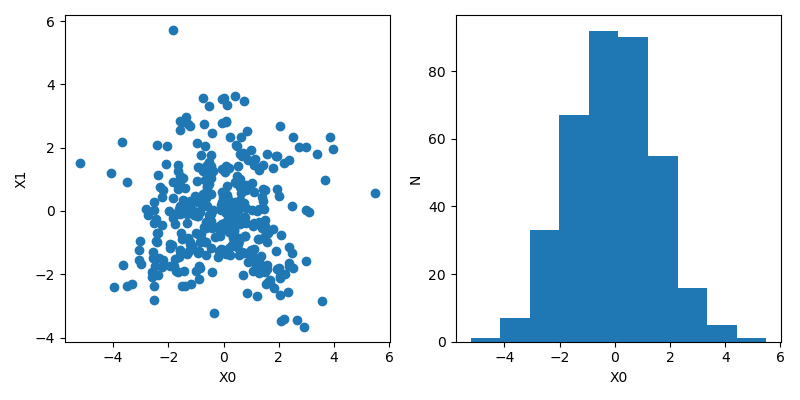

In [100]:
fig, axes = plt.subplots(1, 2, sharex=True,
                         figsize=(8,4))
basic_scatter(axes[0], X)
basic_histogram(axes[1], X)
fig.tight_layout()

This now constitutes our "basic plot" using the `matplotlib` defaults. (Technically we have specified a marker symbol, though note - this symbol is the default for [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).)

Now we will change the `matplotlib` parameters and examine simple ways to more effectively communicate (hopefully it is now clear why "silly" functions were constructed for this problem).

## Problem 2) Symbols

The above figure is not satisfying. The large number of overlapping points near the center of the scatter plot obscures the true density of the data in that region. This problem focuses on different plotting symbols. 

**Problem 2a**

Remake the scatter plot from above using the `matplotlib` point symbol (`m='.'`), which is also a circle, but by default smaller than the `'o'` marker symbol.

*Hint - for the remainder of this problem you can ignore the histogram.*

<IPython.core.display.Javascript object>


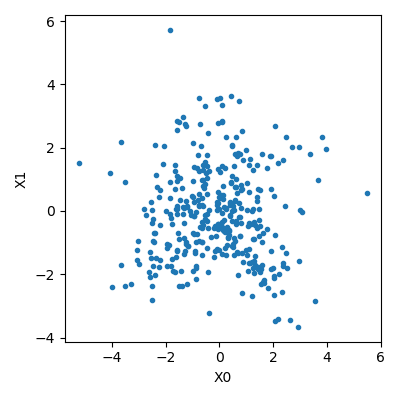

In [82]:
fig, axes = plt.subplots(1, 1, sharex=True,
                         figsize=(4,4))
basic_scatter(axes, X, m='.')
fig.tight_layout()

That is better but the problem persists. We can of course always go smaller...

**Problem 2b**

Remake the scatter plot using the `matplotlib` pixel symbol (`m=','`).

<IPython.core.display.Javascript object>


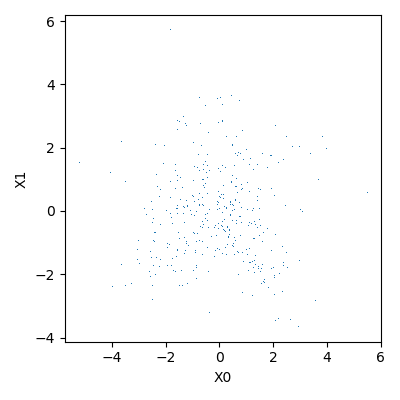

In [83]:
fig, axes = plt.subplots(1, 1, sharex=True,
                         figsize=(4,4))
basic_scatter(axes, X, m=',')
fig.tight_layout()

The points no longer overlap, but they are also nearly illegible. 

**Problem 2c**

Make a grid of 5 side-by-side plots showing the following common symbols: circle `'o'`, square `'s'`, triangle `'^'`, plus sign `'+'`, and hexagon `'h'`. 

<IPython.core.display.Javascript object>


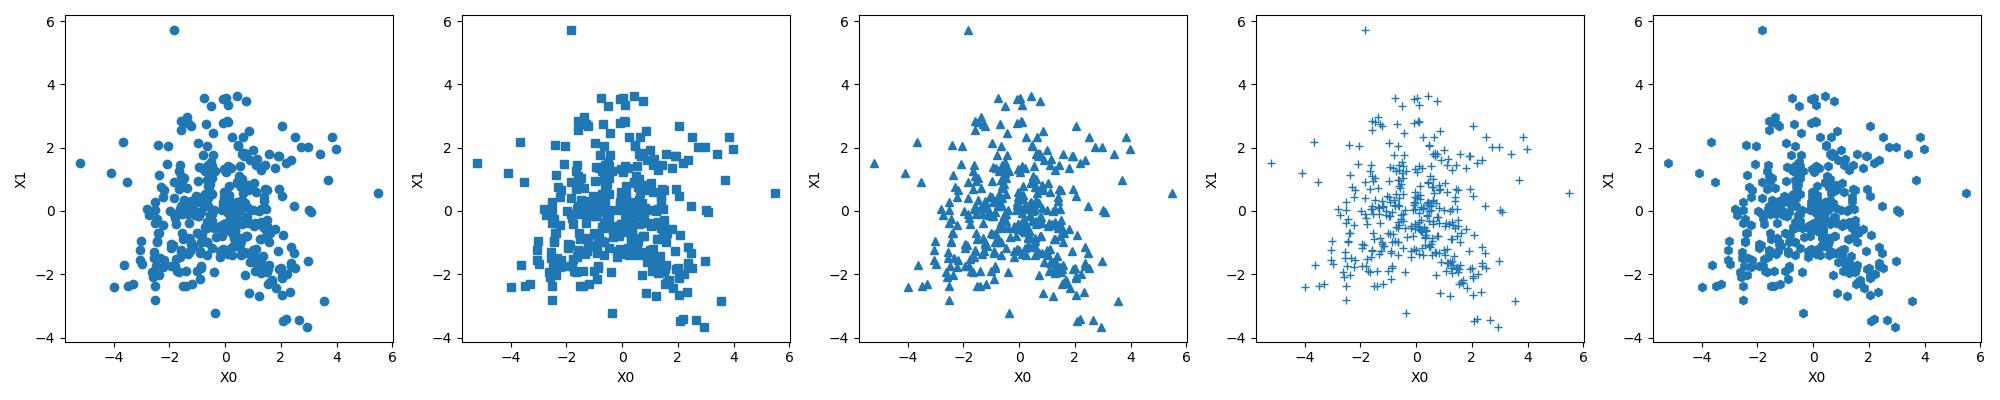

In [85]:
fig, axes = plt.subplots(1, 5, sharex=True,
                         figsize=(20,4))
for ax, sym in zip(axes, ['o', 's', '^', '+', 'h']):
    basic_scatter(ax, X, m=sym)
fig.tight_layout()

**Problem 2d**

Repeat the same grid using open symbols (i.e., only the outline of the symbol should be displayed). 

<IPython.core.display.Javascript object>


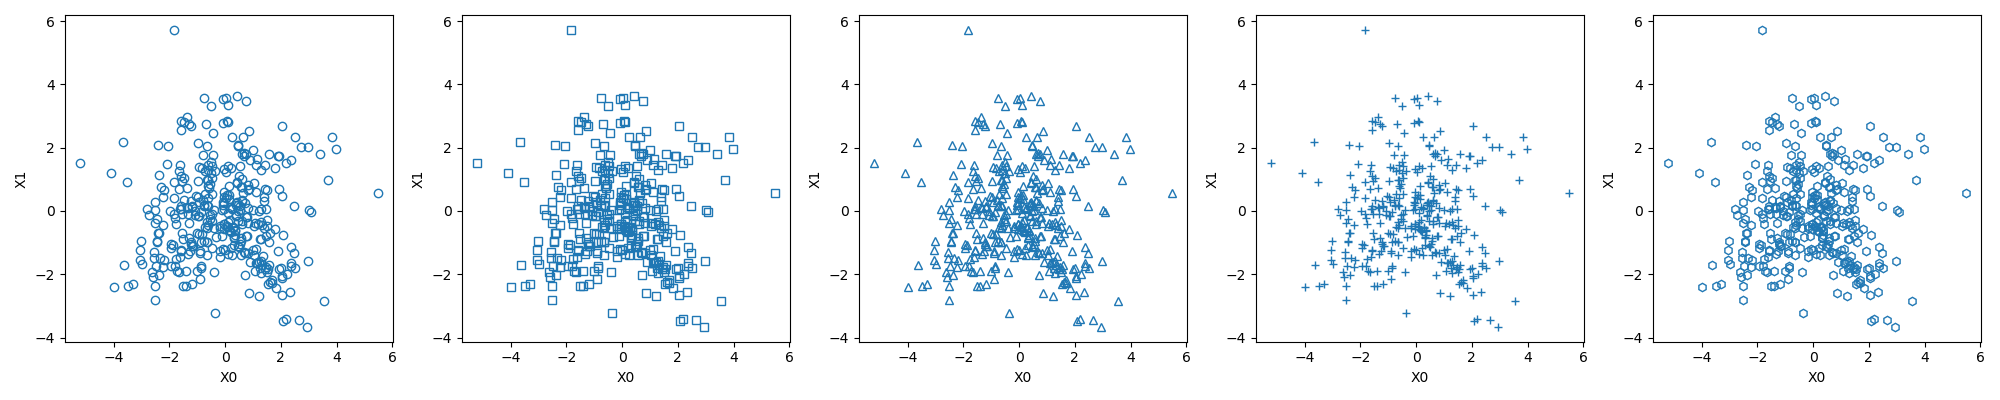

In [101]:
fig, axes = plt.subplots(1, 5, sharex=True,
                         figsize=(20,4))
for ax, sym in zip(axes, ['o', 's', '^', '+', 'h']):
    basic_scatter(ax, X, m=sym, mfc='None')
fig.tight_layout()

If the grid of plots is very small on your screen – be sure to consider each panel in detail (either zoom in, or remake the plot at a larger size, etc). What do you notice?

A few things stand out:
  -  open symbols better convey density than filled symbols
  -  nevertheless as N grows, saturation will again occur obscuring the underlying density
  -  overlapping polygons make other polygons

The open circle is the most flexible symbol. Overlapping circles do not create new circles thereby providing a more unique sense of the underlying density.

(Quick aside - as N grows very large, plotting the individual points is not informative. Consider alternatives, e.g., contours, 2d histogram, etc.)

## Problem 3) Strong Visual Boundaries

We have, until now, ignored the different classes in our data set. We will now consider visualizations that feature $> 1$ symbol.

**Problem 3a**

Start with the `matplotlib` defaults and remake the "basic plot" from **1d** with different symbols for class 0 and class 1 (ignore class 2 for now).

<IPython.core.display.Javascript object>


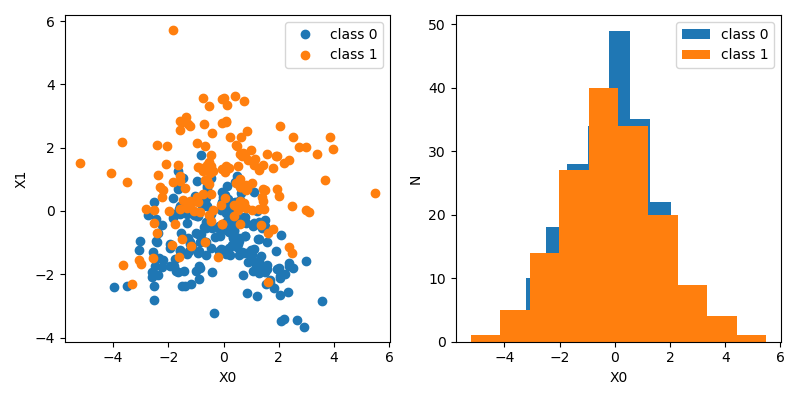

In [105]:
class0 = np.where(y == 0)
class1 = np.where(y == 1)

fig, axes = plt.subplots(1, 2, sharex=True,
                         figsize=(8,4))
for class_num, this_class in enumerate([class0, class1]):
    basic_scatter(axes[0], X[this_class], label='class {}'.format(class_num))
    basic_histogram(axes[1], X[this_class], label='class {}'.format(class_num))
for ax in axes:
    ax.legend()
fig.tight_layout()

The above plot shows that class 0 and 1 have similar distributions along the $\mathtt{X0}$ axis, while class 1 tends to have larger values in $\mathtt{X1}$ than class 0.

We also see that the filled circle performs worse as the number of classes increases, while filled histograms greatly obscure the data when the distributions exhibit significant overlap. 

While minor changes to the above code can rectify these changes, we are highlighting the defaults for `matplotlib`.

**Problem 3b**

Following **2d** re-make the plot from **3a** using open circles and open histograms. 

*Hint - use the kwarg `histtype='step'` in the call to `basic_histogram()`*

<IPython.core.display.Javascript object>


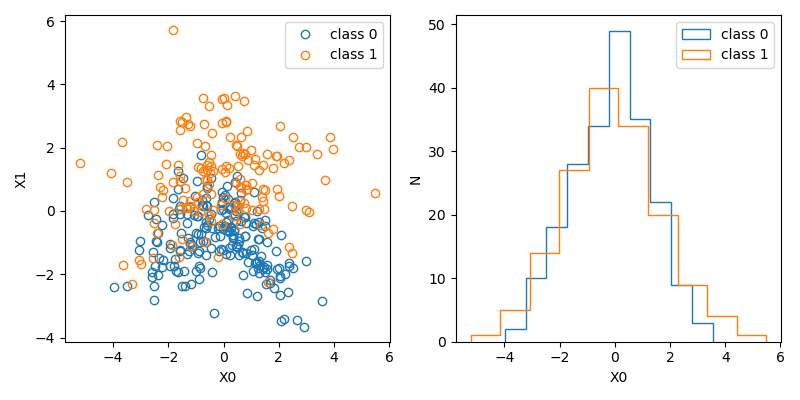

In [108]:
fig, axes = plt.subplots(1, 2, sharex=True,
                         figsize=(8,4))
for class_num, this_class in enumerate([class0, class1]):
    basic_scatter(axes[0], X[this_class], mfc='None', label='class {}'.format(class_num))
    basic_histogram(axes[1], X[this_class], histtype='step', label='class {}'.format(class_num))
for ax in axes:
    ax.legend()
fig.tight_layout()

This represents an improvement, as we now get a better sense of the data density in regions of overlap.

This representation lacks strong visual boundaries. We can only differentiate the classes via color. As we have discussed previously, and will discuss again later this week, color is not an efficient in the transmission of information. 

As a rule of thumb it is a good idea to first - build strong visual boundaries, and then - add color (if it is necessary). 

**Problem 3c**

Plot class 0 as an open circle and filled histogram, and plot class 1 as a cross and open histrogram. 

*Hint - if you are using a for loop the python `zip()` function may come in handy.*

<IPython.core.display.Javascript object>


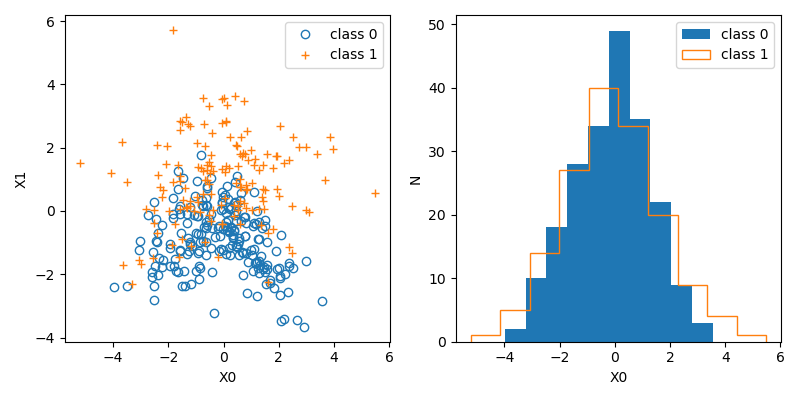

In [114]:
fig, axes = plt.subplots(1, 2, sharex=True,
                         figsize=(8,4))

for class_num, (this_class, m, ht) in enumerate(zip([class0, class1],
                                                    ['o', '+'], 
                                                    ['bar', 'step'])):
    basic_scatter(axes[0], X[this_class], m=m, mfc='None', label='class {}'.format(class_num))
    basic_histogram(axes[1], X[this_class], histtype=ht, label='class {}'.format(class_num))
for ax in axes:
    ax.legend()
fig.tight_layout()

The visual boundaries between the two classes are now much stronger. While we still use color, we do not rely on color  to tell the difference between the classes. The boundaries can be improved further.

**Problem 3d** 

Make additional changes to the `kwargs` to build even stronger visual boundaries between the two classes.

<IPython.core.display.Javascript object>


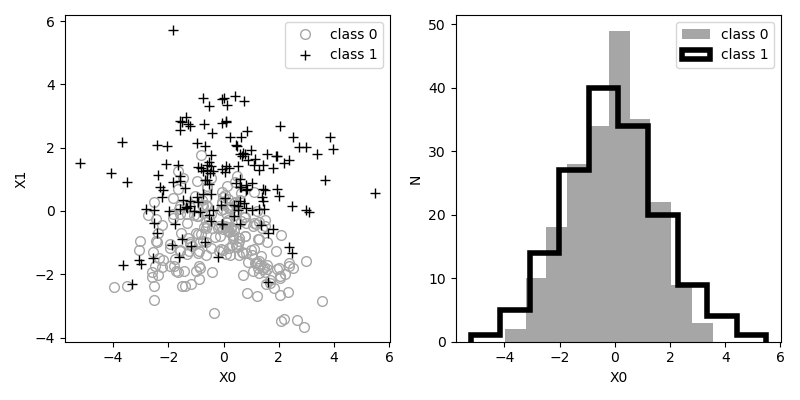

In [126]:
# a solution with only greyscale (not a requirement, but nevertheless instructive)

fig, axes = plt.subplots(1, 2, sharex=True,
                         figsize=(8,4))

for class_num, (this_class, m, ht, mec) in enumerate(zip([class0, class1],
                                                         ['o', '+'], 
                                                         ['bar', 'step'],
                                                         ['0.65', 'k'])):
    basic_scatter(axes[0], X[this_class], 
                  m=m, mfc='None', mec=mec, ms=7,
                  label='class {}'.format(class_num))
    basic_histogram(axes[1], X[this_class], 
                    color=mec, histtype=ht, lw=4,
                    label='class {}'.format(class_num))
for ax in axes:
    ax.legend()
fig.tight_layout()

Strong visual boundaries are essential for *efficient* communication.

**Problem 3e**

Execute the cell below to see 5 different scatter plots, where only the symbol is being varied. Which combinations lead to strong visual boundaries? Which do not?

*Note - I have reduced the size of each class by a factor of 4 to reduce the crowding in the plots*

<IPython.core.display.Javascript object>


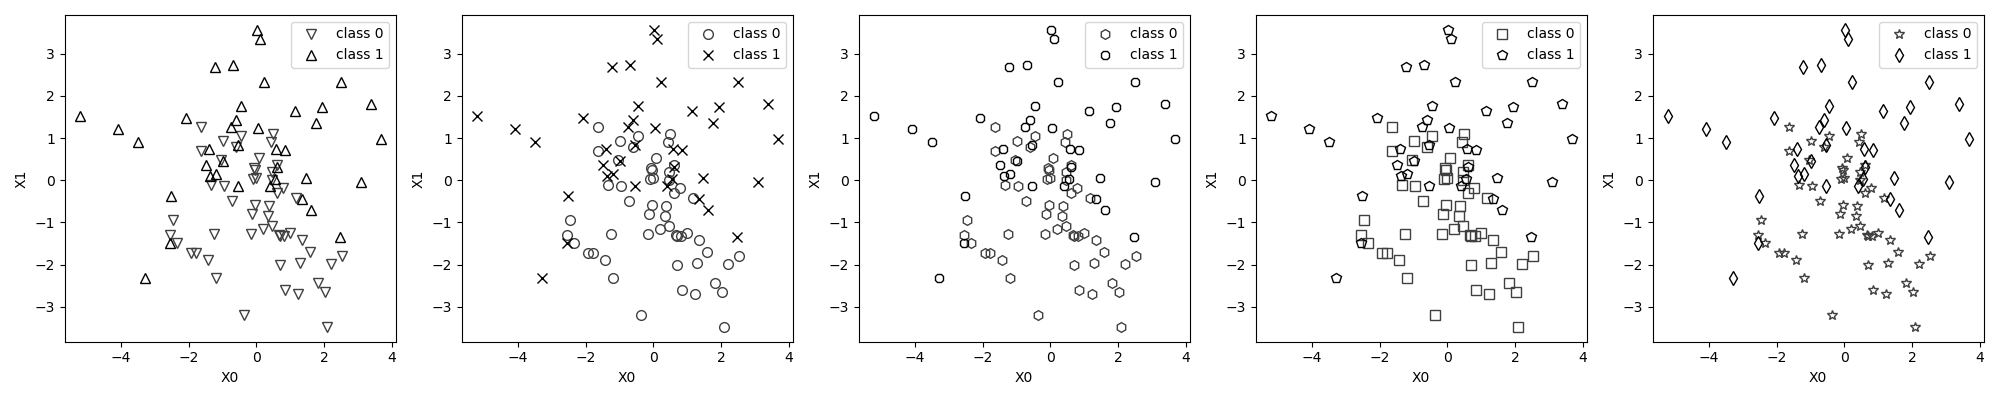

In [139]:
fig, axes = plt.subplots(1, 5, sharex=True,
                         figsize=(20,4))


for ax, sym_pair in zip(axes, [['v', '^'], # triangle up and triangle down
                               ['o', 'x'], # circle and x
                               ['h', '8'], # hexagon and octogon
                               ['s', 'p'], # square and pentagon
                               ['*', 'd']  # diamond and star
                              ]):
    for class_num, (this_class, m,  mec) in enumerate(zip([class0[0][::4], class1[0][::4]],
                                                             sym_pair, 
                                                             ['0.25', 'k'])):
        basic_scatter(ax, X[this_class], 
                      m=m, mfc='None', mec=mec, ms=7,
                      label='class {}'.format(class_num))
    ax.legend()
fig.tight_layout()

As we saw before the circle and x have strong boundaries. Polygons, espeically polygons with the same or a similar number of sides have extremely weak visual boundaries. The star and the diamond have moderately strong boundaries - but recall that the star is generally assumed to be a "special" symbol and therefore more important than any other symbol, and therefore should be used judicially.

## Problem 4) Axes & Grids

By default `matplotlib` has tickmarks pointing "out" and only located on the left and bottom axes (see any plot above to confirm). 

**Problem 4a** 

